In [59]:
import pandas as pd
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'


class BacktestBase(object):    
    
    def __init__(self, symbol, start, end, amount, ftc=0.0, ptc=0.0, verbose=True, intraday=False):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_amount = amount
        self.amount = amount
        self.ftc = ftc
        self.ptc = ptc
        self.units = 0
        self.position = 0
        self.trades = 0
        self.verbose = verbose
        self.get_data(symbol, intraday)

    def get_data(self, symbol, intraday):
        ''' Lê e prepara os dados.
        '''
        if intraday:
            csv_path = f'/media/sf_p4t_docs/pyalgo/dados/{symbol}_intraday_mt5timeframe_{timeframe}.csv'
        else:
            csv_path = f'/media/sf_p4t_docs/pyalgo/dados/{symbol}_daily.csv'

        raw = pd.read_csv(csv_path, index_col=['datetime'], parse_dates=True).dropna()
        raw = pd.DataFrame(raw['close'])
        raw = raw.loc[self.start:self.end]
        raw['return'] = np.log(raw / raw.shift(1))
        self.data = raw.dropna()

    def plot_data(self, cols=None):
        ''' Plota os preços do ativo.
        '''
        if cols is None:
            cols = ['close']
        self.data['close'].plot(figsize=(10, 6), title=self.symbol)

    def get_date_price(self, bar):
        ''' Retorna data e preço para a barra.
        '''
        date = str(self.data.index[bar])[:10]
        price = self.data.close.iloc[bar]
        return date, price

    def print_balance(self, bar):
        ''' Print out current cash balance info.
        '''
        date, price = self.get_date_price(bar)
        print(f'{date} | current balance {self.amount:.2f}')

    def print_net_wealth(self, bar):
        ''' Print out current cash balance info.
        '''
        date, price = self.get_date_price(bar)
        net_wealth = self.units * price + self.amount
        print(f'{date} | current net wealth {net_wealth:.2f}')

    def place_buy_order(self, bar, units=None, amount=None):
        ''' Place a buy order.
        '''
        date, price = self.get_date_price(bar)
        if units is None:
            units = int(amount / price)
        self.amount -= (units * price) * (1 + self.ptc) + self.ftc
        self.units += units
        self.trades += 1
        if self.verbose:
            print(f'{date} | buying {units} units at {price:.2f}. Total bought {units*price:.2f}')
            self.print_balance(bar)
            self.print_net_wealth(bar)

    def place_sell_order(self, bar, units=None, amount=None):
        ''' Place a sell order.
        '''
        date, price = self.get_date_price(bar)
        if units is None:
            units = int(amount / price)
        self.amount += (units * price) * (1 - self.ptc) - self.ftc
        self.units -= units
        self.trades += 1
        if self.verbose:
            print(f'{date} | selling {units} units at {price:.2f}. Total sold {units*price:.2f}')
            self.print_balance(bar)
            self.print_net_wealth(bar)

    def close_out(self, bar):
        ''' Closing out a long or short position.
        '''
        date, price = self.get_date_price(bar)
        self.amount += self.units * price
        self.units = 0
        self.trades += 1
        if self.verbose:
            print(f'{date} | inventory {self.units} units at {price:.2f}')
            print('=' * 55)
        print('Final balance [$] {:.2f}'.format(self.amount))
        perf = ((self.amount - self.initial_amount) / self.initial_amount * 100)
        print('Net Performance [%] {:.2f}'.format(perf))
        print('Trades Executed [#] {:.2f}'.format(self.trades))
        print('=' * 55)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 694 entries, 2019-01-03 to 2021-10-19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   694 non-null    float64
 1   return  694 non-null    float64
dtypes: float64(2)
memory usage: 16.3 KB
None
            close    return
datetime                   
2021-10-13  24.15 -0.004132
2021-10-14  24.05 -0.004149
2021-10-15  24.66  0.025048
2021-10-18  24.90  0.009685
2021-10-19  24.35 -0.022336


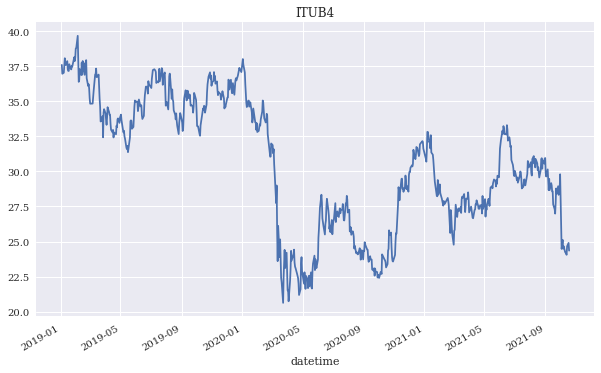

In [18]:
if __name__ == '__main__':
    bb = BacktestBase('ITUB4', '2019-01-01', '2021-10-19', 1000)
    print(bb.data.info())
    print(bb.data.tail())
    bb.plot_data()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679 entries, 2019-01-03 to 2021-10-19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   679 non-null    float64
 1   return  679 non-null    float64
dtypes: float64(2)
memory usage: 15.9 KB
None
               close    return
datetime                      
2021-10-13  113775.0  0.014831
2021-10-14  114655.0  0.007705
2021-10-15  115560.0  0.007862
2021-10-18  115290.0 -0.002339
2021-10-19  112150.0 -0.027613


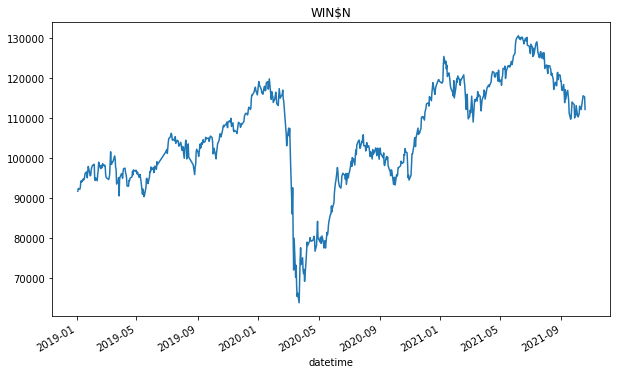

In [19]:
if __name__ == '__main__':
    bb = BacktestBase('WIN$N', '2019-01-01', '2021-10-19', 1000)
    print(bb.data.info())
    print(bb.data.tail())
    bb.plot_data()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 694 entries, 2019-01-03 to 2021-10-19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   694 non-null    float64
 1   return  694 non-null    float64
dtypes: float64(2)
memory usage: 16.3 KB
None
            close    return
datetime                   
2021-10-13  14.51  0.008305
2021-10-14  14.17 -0.023711
2021-10-15  14.53  0.025088
2021-10-18  14.32 -0.014558
2021-10-19  13.78 -0.038439


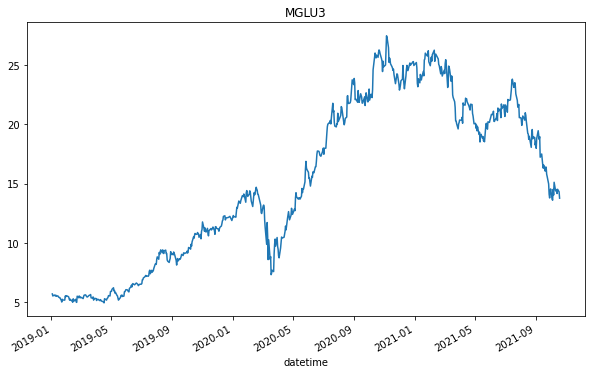

In [20]:
if __name__ == '__main__':
    bb = BacktestBase('MGLU3', '2019-01-01', '2021-10-19', 1000)
    print(bb.data.info())
    print(bb.data.tail())
    bb.plot_data()

In [33]:
class BacktestLongOnly(BacktestBase):
    
    def run_sma_strategy(self, SMA1, SMA2):
        msg = f'\n\nIniciando estratégia de Cruzamento de Médias | '
        msg += f'SMA1={SMA1} & SMA2={SMA2}'
        msg += f'\ncustos fixos {self.ftc} | '
        msg += f'custos proporcionais {self.ptc}'
        print(msg)
        print('=' * 55)
        self.position = 0
        self.trades = 0
        self.amount = self.initial_amount
        
        self.data['SMA1'] = self.data['close'].rolling(SMA1).mean()
        self.data['SMA2'] = self.data['close'].rolling(SMA2).mean()
        
        for bar in range(SMA2, len(self.data)):
            if self.position == 0:
                if self.data['SMA1'].iloc[bar] > self.data['SMA2'].iloc[bar]:
                    self.place_buy_order(bar, amount=self.amount)
                    self.position = 1
            elif self.position == 1:
                if self.data['SMA1'].iloc[bar] < self.data['SMA2'].iloc[bar]:
                    self.place_sell_order(bar, units=self.units)
                    self.position = 0
                    self.close_out(bar)
                    
    def run_momentum_strategy(self, momentum):
        msg = f'\n\nIniciando estratégia de momentum | '
        msg += f'{momentum} dias'
        msg += f'\ncustos fixos {self.ftc} | '
        msg += f'custos proporcionais {self.ptc}'
        print(msg)
        print('=' * 55)
        self.position = 0
        self.trades = 0
        self.amount = self.initial_amount
        
        self.data['momentum'] = self.data['return'].rolling(momentum).mean()
        
        for bar in range(momentum, len(self.data)):
            if self.position == 0:
                if self.data['momentum'].iloc[bar] > 0:
                    self.place_buy_order(bar, amount=self.amount)
                    self.position = 1
            elif self.position == 1:
                if self.data['momentum'].iloc[bar] < 0:
                    self.place_sell_order(bar, units=self.units)
                    self.position = 0
                    self.close_out(bar)
            
    
    def run_mean_reversion_strategy(self, SMA, threshold):
        msg = f'\n\nIniciando estratégia de Reversão à Média | '
        msg += f'SMA={SMA} & thr={threshold}'
        msg += f'\ncustos fixos {self.ftc} | '
        msg += f'custos proporcionais {self.ptc}'
        print(msg)
        print('=' * 55)
        self.position = 0
        self.trades = 0
        self.amount = self.initial_amount
        
        self.data['SMA'] = self.data['close'].rolling(SMA).mean()
        
        for bar in range(SMA, len(self.data)):
            if self.position == 0:
                if (self.data['close'].iloc[bar] < self.data['SMA'].iloc[bar] - threshold):
                    self.place_buy_order(bar, amount = self.amount)
                    self.position = 1
            elif self.position == 1:
                if self.data['close'].iloc[bar] >= self.data['SMA'].iloc[bar]:
                    self.place_sell_order(bar, units=self.units)
                    self.position = 0
                    self.close_out(bar)
            

In [31]:
if __name__ == '__main__':
    def run_strategies():
        lobt.run_mean_reversion_strategy(50, 0.8)

lobt = BacktestLongOnly('VALE3', '2019-01-01', '2021-10-19', 1000, verbose=True)
run_strategies()




Iniciando estratégia de Reversão à Média | SMA=50 & thr=0.8
custos fixos 0.0 | custos proporcionais 0.0
2019-05-02 | Comprando 22 ações a R$ 44.08
2019-05-02 | Saldo corrente R$ 30.24
2019-05-02 | Balanço atual R$ 1000.00
2019-05-03 | Vendendo 22 ações a R$ 45.54
2019-05-03 | Saldo corrente R$ 1032.12
2019-05-03 | Balanço atual R$ 1032.12
2019-05-03 | Inventory 0 units at 45.54
Balanço final [R$] 1032.12
Performance líquida [%] 3.21
Trades executados [#] 3.00
2019-05-08 | Comprando 23 ações a R$ 44.24
2019-05-08 | Saldo corrente R$ 14.60
2019-05-08 | Balanço atual R$ 1032.12
2019-05-27 | Vendendo 23 ações a R$ 45.26
2019-05-27 | Saldo corrente R$ 1055.58
2019-05-27 | Balanço atual R$ 1055.58
2019-05-27 | Inventory 0 units at 45.26
Balanço final [R$] 1055.58
Performance líquida [%] 5.56
Trades executados [#] 6.00
2019-05-31 | Comprando 23 ações a R$ 44.36
2019-05-31 | Saldo corrente R$ 35.30
2019-05-31 | Balanço atual R$ 1055.58
2019-06-11 | Vendendo 23 ações a R$ 46.54
2019-06-11 | S

In [36]:
if __name__ == '__main__':
    def run_strategies():
        lobt.run_sma_strategy(9, 26)

lobt = BacktestLongOnly('VALE3', '2019-01-01', '2021-10-19', 1000, verbose=True)
run_strategies()



Iniciando estratégia de Cruzamento de Médias | SMA1=9 & SMA2=26
custos fixos 0.0 | custos proporcionais 0.0
2019-02-27 | Comprando 23 ações a R$ 42.22
2019-02-27 | Saldo corrente R$ 28.94
2019-02-27 | Balanço atual R$ 1000.00
2019-04-30 | Vendendo 23 ações a R$ 45.10
2019-04-30 | Saldo corrente R$ 1066.24
2019-04-30 | Balanço atual R$ 1066.24
2019-04-30 | Inventory 0 units at 45.10
Balanço final [R$] 1066.24
Performance líquida [%] 6.62
Trades executados [#] 3.00
2019-05-31 | Comprando 24 ações a R$ 44.36
2019-05-31 | Saldo corrente R$ 1.60
2019-05-31 | Balanço atual R$ 1066.24
2019-07-26 | Vendendo 24 ações a R$ 45.25
2019-07-26 | Saldo corrente R$ 1087.60
2019-07-26 | Balanço atual R$ 1087.60
2019-07-26 | Inventory 0 units at 45.25
Balanço final [R$] 1087.60
Performance líquida [%] 8.76
Trades executados [#] 6.00
2019-09-06 | Comprando 26 ações a R$ 41.83
2019-09-06 | Saldo corrente R$ 0.02
2019-09-06 | Balanço atual R$ 1087.60
2019-10-03 | Vendendo 26 ações a R$ 41.20
2019-10-03 |

In [37]:
if __name__ == '__main__':
    def run_strategies():
        lobt.run_momentum_strategy(60)

lobt = BacktestLongOnly('VALE3', '2019-01-01', '2021-10-19', 1000, verbose=True)
run_strategies()



Iniciando estratégia de momentum | 60 dias
custos fixos 0.0 | custos proporcionais 0.0
2019-04-02 | Comprando 21 ações a R$ 46.54
2019-04-02 | Saldo corrente R$ 22.66
2019-04-02 | Balanço atual R$ 1000.00
2019-04-03 | Vendendo 21 ações a R$ 46.74
2019-04-03 | Saldo corrente R$ 1004.20
2019-04-03 | Balanço atual R$ 1004.20
2019-04-03 | Inventory 0 units at 46.74
Balanço final [R$] 1004.20
Performance líquida [%] 0.42
Trades executados [#] 3.00
2019-04-04 | Comprando 21 ações a R$ 47.08
2019-04-04 | Saldo corrente R$ 15.52
2019-04-04 | Balanço atual R$ 1004.20
2019-04-05 | Vendendo 21 ações a R$ 46.88
2019-04-05 | Saldo corrente R$ 1000.00
2019-04-05 | Balanço atual R$ 1000.00
2019-04-05 | Inventory 0 units at 46.88
Balanço final [R$] 1000.00
Performance líquida [%] 0.00
Trades executados [#] 6.00
2019-04-25 | Comprando 21 ações a R$ 45.50
2019-04-25 | Saldo corrente R$ 44.50
2019-04-25 | Balanço atual R$ 1000.00
2019-06-05 | Vendendo 21 ações a R$ 43.76
2019-06-05 | Saldo corrente R$ 

In [66]:
class BacktestLongShort(BacktestBase):
    
    def go_long(self, bar, units=None, amount=None):
        if self.position == -1:
            self.place_buy_order(bar, units=-self.units)
        if units:
            self.place_buy_order(bar, units=units)
        elif amount:
            if amount == 'all':
                amount = self.amount
            self.place_buy_order(bar, amount=amount)
            
    def go_short(self, bar, units=None, amount=None):
        if self.position == 1:
            self.place_sell_order(bar, units=self.units)
        if units:
            self.place_sell_order(bar, units=units)
        elif amount:
            if amount == 'all':
                amount = self.amount
            self.place_sell_order(bar, amount=amount)
            
    def run_sma_strategy(self, SMA1, SMA2):
        msg = f'\n\nIniciando estratégia de Cruzamento de Médias | '
        msg += f'SMA1={SMA1} & SMA2={SMA2}'
        msg += f'\ncustos fixos {self.ftc} | '
        msg += f'custos proporcionais {self.ptc}'
        print(msg)
        print('=' * 55)
        self.position = 0
        self.trades = 0
        self.amount = self.initial_amount
        
        self.data['SMA1'] = self.data['close'].rolling(SMA1).mean()
        self.data['SMA2'] = self.data['close'].rolling(SMA2).mean()
        
        for bar in range(SMA2, len(self.data)):
            if self.position in [0, -1]:
                if self.data['SMA1'].iloc[bar] > self.data['SMA2'].iloc[bar]:
                    self.go_long(bar, amount='all')
                    self.position = 1 # long position
            if self.position in [0, 1]:
                if self.data['SMA1'].iloc[bar] < self.data['SMA2'].iloc[bar]:
                    self.go_short(bar, amount='all')
                    self.position = -1 # short position
        self.close_out(bar)
                    
    def run_momentum_strategy(self, momentum):
        msg = f'\n\nIniciando estratégia de momentum | '
        msg += f'{momentum} dias'
        msg += f'\ncustos fixos {self.ftc} | '
        msg += f'custos proporcionais {self.ptc}'
        print(msg)
        print('=' * 55)
        self.position = 0
        self.trades = 0
        self.amount = self.initial_amount
        
        self.data['momentum'] = self.data['return'].rolling(momentum).mean()
        
        for bar in range(momentum, len(self.data)):
            if self.position in [0, -1]:
                if self.data['momentum'].iloc[bar] > 0:
                    self.go_long(bar, amount='all')
                    self.position = 1 # long position
            if self.position in [0, 1]:
                if self.data['momentum'].iloc[bar] <= 0:
                    self.go_short(bar, amount='all')
                    self.position = -1 # short position
        self.close_out(bar)            
    
    def run_mean_reversion_strategy(self, SMA, threshold):
        msg = f'\n\nIniciando estratégia de Reversão à Média | '
        msg += f'SMA={SMA} & thr={threshold}'
        msg += f'\ncustos fixos {self.ftc} | '
        msg += f'custos proporcionais {self.ptc}'
        print(msg)
        print('=' * 55)
        self.position = 0
        self.trades = 0
        self.amount = self.initial_amount
        
        self.data['SMA'] = self.data['close'].rolling(SMA).mean()
        
        for bar in range(SMA, len(self.data)):
            if self.position == 0:
                if (self.data['close'].iloc[bar] < self.data['SMA'].iloc[bar] - threshold):
                    self.go_long(bar, amount=self.initial_amount)
                    self.position = 1
            elif (self.data['close'].iloc[bar] > self.data['SMA'].iloc[bar] + threshold):
                self.go_short(bar, amount=self.initial_amount)
                self.position = -1
            elif self.position == 1:
                if self.data['close'].iloc[bar] >= self.data['SMA'].iloc[bar]:
                    self.place_sell_order(bar, units=self.units)
                    self.position = 0
            elif self.position == -1:
                if self.data['close'].iloc[bar] <= self.data['SMA'].iloc[bar]:
                    self.place_buy_order(bar, units=-self.units)
                    self.position = 0
        self.close_out(bar)

In [61]:
if __name__ == '__main__':
    def run_strategies():
        lobt.run_sma_strategy(42, 252)

lobt = BacktestLongShort('VALE3', '2019-01-01', '2021-10-19', 1000, verbose=True)
run_strategies()



Iniciando estratégia de Cruzamento de Médias | SMA1=42 & SMA2=252
custos fixos 0.0 | custos proporcionais 0.0
2020-01-09 | buying 20 units at 49.14. Total bought 982.80
2020-01-09 | current balance 17.20
2020-01-09 | current net wealth 1000.00
2020-03-19 | selling 20 units at 33.06. Total sold 661.20
2020-03-19 | current balance 678.40
2020-03-19 | current net wealth 678.40
2020-03-19 | selling 20 units at 33.06. Total sold 661.20
2020-03-19 | current balance 1339.60
2020-03-19 | current net wealth 678.40
2020-06-09 | buying 20 units at 50.52. Total bought 1010.40
2020-06-09 | current balance 329.20
2020-06-09 | current net wealth 329.20
2020-06-09 | buying 6 units at 50.52. Total bought 303.12
2020-06-09 | current balance 26.08
2020-06-09 | current net wealth 329.20
2021-10-06 | selling 6 units at 77.24. Total sold 463.44
2021-10-06 | current balance 489.52
2021-10-06 | current net wealth 489.52
2021-10-06 | selling 6 units at 77.24. Total sold 463.44
2021-10-06 | current balance 95

In [64]:
if __name__ == '__main__':
    def run_strategies():
        lobt.run_momentum_strategy(30)

lobt = BacktestLongShort('VALE3', '2019-01-01', '2021-10-19', 1000, verbose=True)
run_strategies()



Iniciando estratégia de momentum | 30 dias
custos fixos 0.0 | custos proporcionais 0.0
2019-02-15 | selling 24 units at 41.38. Total sold 993.12
2019-02-15 | current balance 1993.12
2019-02-15 | current net wealth 1000.00
2019-03-13 | buying 24 units at 45.69. Total bought 1096.56
2019-03-13 | current balance 896.56
2019-03-13 | current net wealth 896.56
2019-03-13 | buying 19 units at 45.69. Total bought 868.11
2019-03-13 | current balance 28.45
2019-03-13 | current net wealth 896.56
2019-04-25 | selling 19 units at 45.50. Total sold 864.50
2019-04-25 | current balance 892.95
2019-04-25 | current net wealth 892.95
2019-04-25 | selling 19 units at 45.50. Total sold 864.50
2019-04-25 | current balance 1757.45
2019-04-25 | current net wealth 892.95
2019-05-03 | buying 19 units at 45.54. Total bought 865.26
2019-05-03 | current balance 892.19
2019-05-03 | current net wealth 892.19
2019-05-03 | buying 19 units at 45.54. Total bought 865.26
2019-05-03 | current balance 26.93
2019-05-03 | 

In [76]:
if __name__ == '__main__':
    def run_strategies():
        lobt.run_mean_reversion_strategy(50, 0.3)

lobt = BacktestLongShort('ITUB4', '2019-01-01', '2021-10-19', 1000, verbose=True)
run_strategies()



Iniciando estratégia de Reversão à Média | SMA=50 & thr=0.3
custos fixos 0.0 | custos proporcionais 0.0
2019-03-19 | buying 27 units at 36.01. Total bought 972.27
2019-03-19 | current balance 27.73
2019-03-19 | current net wealth 1000.00
2019-05-28 | selling 27 units at 34.00. Total sold 918.00
2019-05-28 | current balance 945.73
2019-05-28 | current net wealth 945.73
2019-05-28 | selling 29 units at 34.00. Total sold 986.00
2019-05-28 | current balance 1931.73
2019-05-28 | current net wealth 945.73
2019-05-29 | selling 28 units at 34.64. Total sold 969.92
2019-05-29 | current balance 2901.65
2019-05-29 | current net wealth 927.17
2019-05-30 | selling 28 units at 35.07. Total sold 981.96
2019-05-30 | current balance 3883.61
2019-05-30 | current net wealth 902.66
2019-05-31 | selling 28 units at 34.97. Total sold 979.16
2019-05-31 | current balance 4862.77
2019-05-31 | current net wealth 911.16
2019-06-03 | selling 28 units at 35.00. Total sold 980.00
2019-06-03 | current balance 5842